In [103]:
# %matplotlib inline
%matplotlib widget
import pandas as pd
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from scipy.optimize import minimize
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from autograd import jacobian, hessian
from time import time 

## Генетический алгоритм geneticalgorithm  https://pypi.org/project/geneticalgorithm/

Оптимизируем функция Растрыгина

In [105]:
def Rastrigin_function(X):
    # dim = len(X)
    OF = 0
    # for i in range(0, dim):
    for i in range(0, 2):
        OF += (X[i] ** 2) - 10 * math.cos(2 * math.pi * X[i]) + 10
    return OF

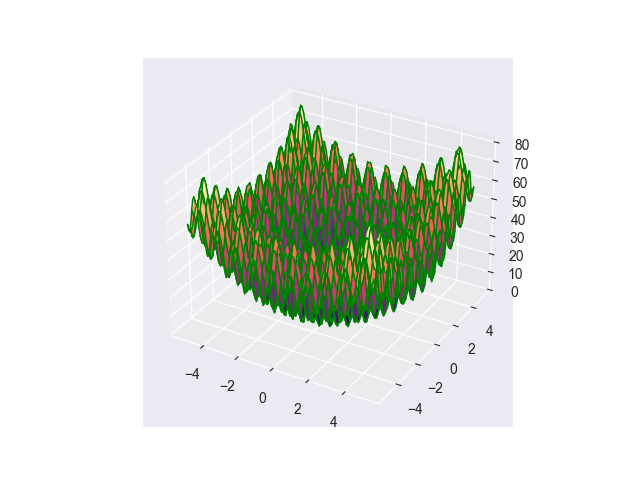

In [106]:
X = np.linspace(-5.12, 5.12, 100)
Y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(X, Y)

Z = (X ** 2 - 10 * np.cos(2 * np.pi * X)) + \
    (Y ** 2 - 10 * np.cos(2 * np.pi * Y)) + 20

fig = plt.figure()
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d.plot_surface(X, Y, Z, cmap='magma', edgecolor='green')

plt.show()

In [111]:
algorithm_param = {'max_num_iteration': 100, 'population_size': 100,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}
varbound = np.array([[-5.12, 5.12]] * 2)
t1 = time()
model = ga(function=Rastrigin_function, dimension=2, variable_type='real', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)
try:
    model.run()
except Exception as ex:
    print(ex)
t2 = time()
print("Время выполнения: {:.2f}s".format(t2 - t1)) 

 The best solution found:                                                                           
 [-0.00374418  0.00097158]

 Objective function:
 0.0029683815435213035
Axes3D.plot() missing 1 required positional argument: 'ys'
Время выполнения: 1.26s


In [41]:
convergence = model.report
print(convergence)


[np.float64(5.001290705042604), np.float64(5.001290705042604), np.float64(5.001290705042604), np.float64(5.001290705042604), np.float64(5.001290705042604), np.float64(5.001290705042604), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.1057048771556008), np.float64(1.0505467381659024), np.float64(1.0505467381659024), np.float64(1.0505467381659024), np.float64(1.0505467381659024), np.float64(1.0505467381659024), np.float64(0.2064221269135338), np.float64(0.2064221269135338), np.float64(0.2064221269135338), np.float64(0.2064221269135338), np.float64(0.

In [98]:
solution = model.output_dict
print(solution)

{'variable': array([ 0.00023821, -0.010842  ]), 'function': np.float64(0.023323055156142303)}


In [47]:
data = pd.DataFrame({'Iteration': range(0, len(convergence)), 'Y': convergence})
data

,Iteration,Y
0,0,5.001291
1,1,5.001291
2,2,5.001291
3,3,5.001291
4,4,5.001291
...,...,...
96,96,0.013638
97,97,0.013638
98,98,0.013638
99,99,0.013638


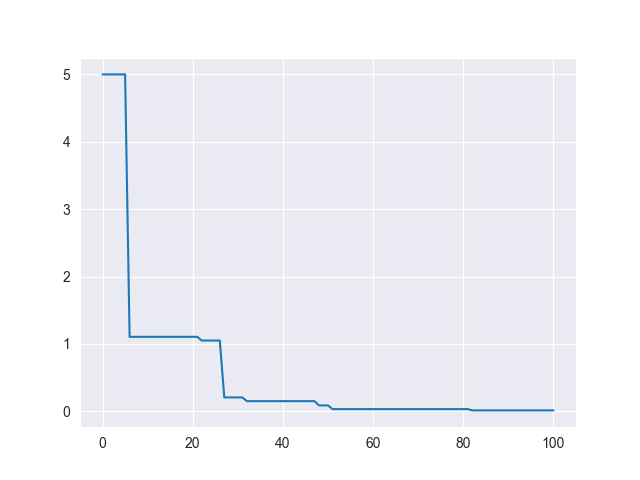

In [49]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(data['Iteration'], data['Y'])

## SLSQP — ньютоновский метод решения системы Лагранжа.

In [113]:
bnds = ((-5, None), (-5, None))
t1 = time()
solution = minimize(Rastrigin_function, (-5,-5), method='SLSQP', bounds=bnds)
print(solution)
t2 = time()
print("Время выполнения: {:.2f}s".format(t2 - t1)) 

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0
       x: [-8.038e-11 -8.038e-11]
     nit: 2
     jac: [ 2.861e-06  2.861e-06]
    nfev: 7
    njev: 2
Время выполнения: 0.00s


In [101]:
solution.keys()

dict_keys(['x', 'fun', 'jac', 'nit', 'nfev', 'njev', 'status', 'message', 'success'])